#EDA with Python and applying Logistic regression on Titanic Dataset

We'll be trying to predict a classification -survival or deceased.

#Importing Libraries

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt 
import seaborn as sns

#Data

In [106]:
train= pd.read_csv('titanic_train.csv')

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Data

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

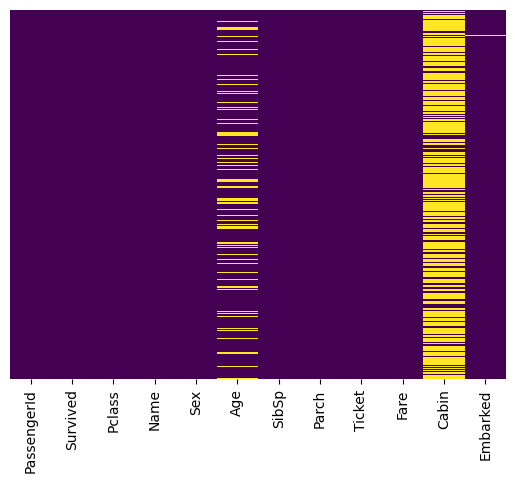

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='count', ylabel='Survived'>

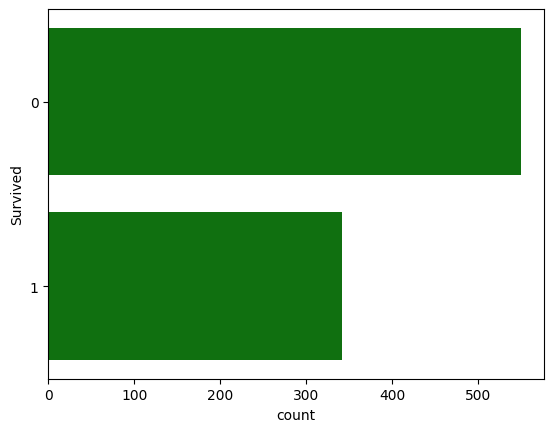

In [20]:
sns.countplot(data=train,y='Survived',color='green')

<Axes: xlabel='Survived', ylabel='count'>

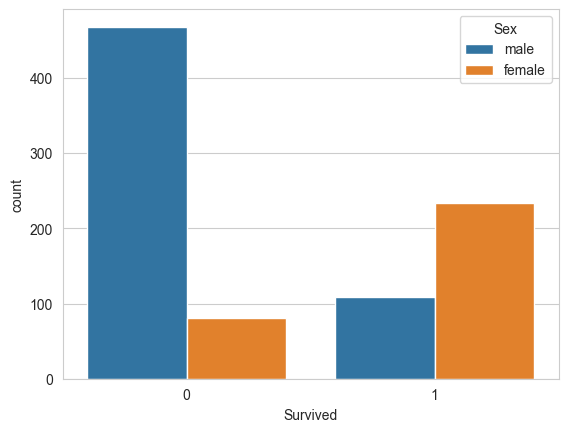

In [26]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

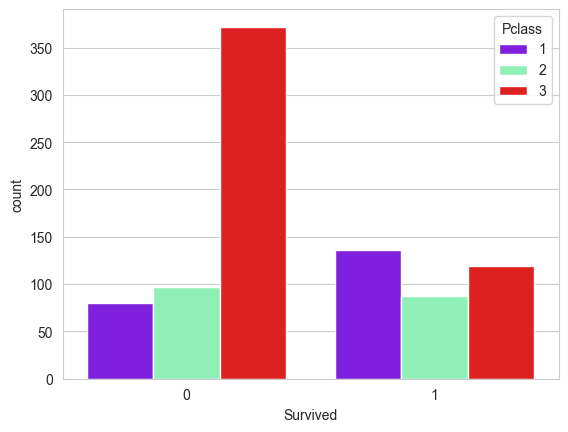

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass',palette='rainbow')

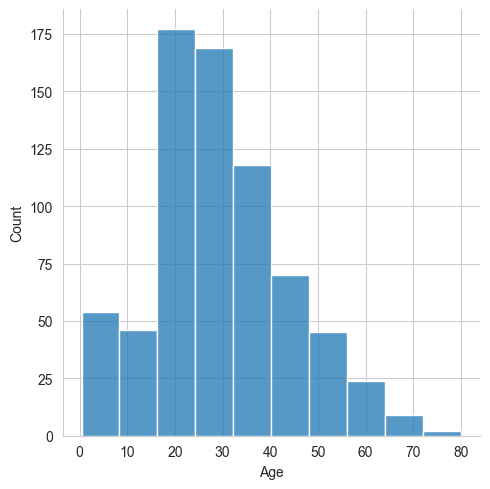

In [35]:
sns.displot(train['Age'].dropna(),kde=False,bins=10)

<Axes: xlabel='SibSp', ylabel='count'>

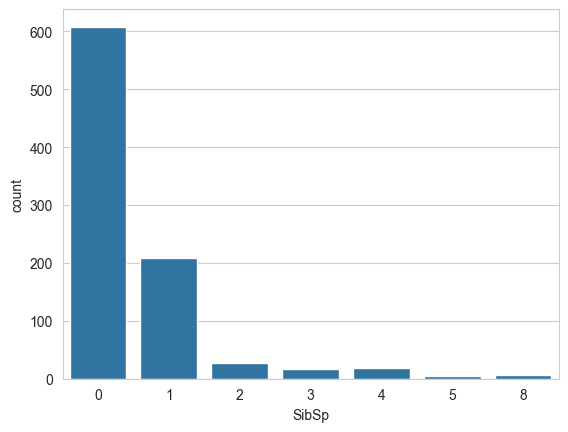

In [37]:
sns.countplot(data=train,x='SibSp')

# Data Cleaning

### We need to fill up the missing data in the Age column

C:\Users\manis\AppData\Local\Temp\ipykernel_18844\2386409424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

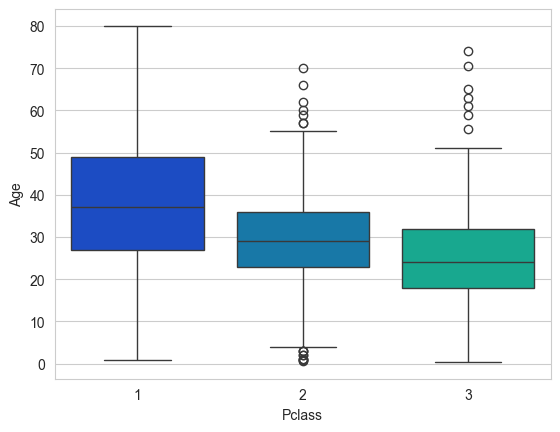

In [43]:
sns.boxplot(x='Pclass',y='Age',data=train, palette='winter')

### Impuation of missing Age columns

In [65]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
       
       if Pclass ==1:
           return 37
       elif Pclass ==2: 
           return 29
       else :
           return 24
    else:
        return Age
              

In [107]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\manis\AppData\Local\Temp\ipykernel_18844\769441979.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\manis\AppData\Local\Temp\ipykernel_18844\769441979.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

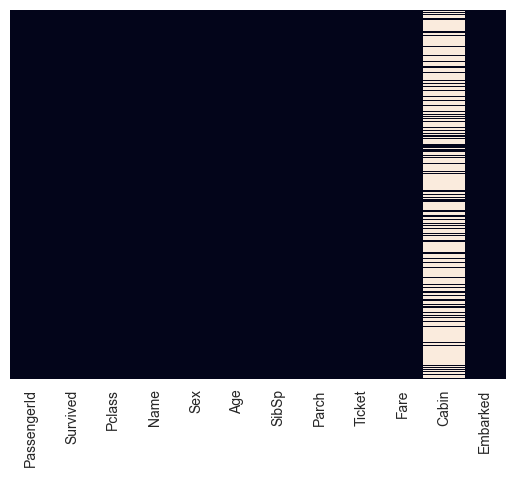

In [108]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

### Drop Cabin column


In [109]:
train.drop('Cabin',axis=1,inplace=True)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [113]:
train_encoded= pd.get_dummies(train,columns=['Embarked','Sex'],drop_first=True,dtype=int)

In [121]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked_Q   891 non-null    int64  
 10  Embarked_S   891 non-null    int64  
 11  Sex_male     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [123]:
train_encoded.drop(['Name','Ticket'],axis=1,inplace=True)

In [124]:
train_encoded.head().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

 # Building a Logistic Regression mOdel

In [81]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test =train_test_split (train_encoded.drop('Survived',axis=1), train_encoded['Survived'],test_size=0.30,random_state=101)

In [ ]:
# Training and Predicting

In [126]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression

In [127]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\manis\Desktop\Python-Practice\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [128]:
predictions=logmodel.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
accuracy=confusion_matrix(y_test,predictions)

In [131]:
accuracy

array([[134,  20],
       [ 42,  72]])

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy=accuracy_score(y_test,predictions)

In [134]:
accuracy

0.7686567164179104